### Target:
    
    - Getting the model skeleton right.

### Results:

    - Model has 500k parameters.

    - Train Accuracy = 99.86

    - Test Accuracy = 99.2

### Analysis:

    - Squeeze expand skeleton gradually increasing channels to 256.

    - Model is still large and overfitting.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

In [7]:
from model import Model2 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model2                                   [64, 1, 28, 28]           [64, 10]                  --                             --
├─Sequential: 1-1                        [64, 1, 28, 28]           [64, 64, 28, 28]          --                             --
│    └─Conv2d: 2-1                       [64, 1, 28, 28]           [64, 32, 28, 28]          288                         0.06%
│    └─ReLU: 2-2                         [64, 32, 28, 28]          [64, 32, 28, 28]          --                             --
│    └─Conv2d: 2-3                       [64, 32, 28, 28]          [64, 64, 28, 28]          18,432                      3.71%
│    └─ReLU: 2-4                         [64, 64, 28, 28]          [64, 64, 28, 28]          --                             --
├─Sequential: 1-2                        [64, 64, 28, 28]          [64, 32, 14, 14]          --                

In [8]:
from utils import train, test

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.0174 Batch_id=937 Average Loss=1.1804 Accuracy=56.35: 100%|██████████| 938/938 [00:49<00:00, 19.14it/s]


Test set: Average loss: 0.1006, Accuracy: 9681/10000 (96.81%)

Epoch 2


Train: Batch Loss=0.1394 Batch_id=937 Average Loss=0.0776 Accuracy=97.65: 100%|██████████| 938/938 [00:49<00:00, 19.09it/s]


Test set: Average loss: 0.0416, Accuracy: 9863/10000 (98.63%)

Epoch 3


Train: Batch Loss=0.0040 Batch_id=937 Average Loss=0.0465 Accuracy=98.55: 100%|██████████| 938/938 [00:47<00:00, 19.81it/s]


Test set: Average loss: 0.0343, Accuracy: 9890/10000 (98.90%)

Epoch 4


Train: Batch Loss=0.0300 Batch_id=937 Average Loss=0.0323 Accuracy=98.99: 100%|██████████| 938/938 [00:43<00:00, 21.71it/s]


Test set: Average loss: 0.0346, Accuracy: 9886/10000 (98.86%)

Epoch 5


Train: Batch Loss=0.0162 Batch_id=937 Average Loss=0.0247 Accuracy=99.20: 100%|██████████| 938/938 [00:42<00:00, 21.86it/s]


Test set: Average loss: 0.0500, Accuracy: 9844/10000 (98.44%)

Epoch 6


Train: Batch Loss=0.0002 Batch_id=937 Average Loss=0.0204 Accuracy=99.35: 100%|██████████| 938/938 [00:48<00:00, 19.28it/s]


Test set: Average loss: 0.0277, Accuracy: 9906/10000 (99.06%)

Epoch 7


Train: Batch Loss=0.0020 Batch_id=937 Average Loss=0.0154 Accuracy=99.51: 100%|██████████| 938/938 [00:51<00:00, 18.34it/s]


Test set: Average loss: 0.0310, Accuracy: 9909/10000 (99.09%)

Epoch 8


Train: Batch Loss=0.0203 Batch_id=937 Average Loss=0.0119 Accuracy=99.60: 100%|██████████| 938/938 [00:55<00:00, 16.94it/s]


Test set: Average loss: 0.0382, Accuracy: 9885/10000 (98.85%)

Epoch 9


Train: Batch Loss=0.0063 Batch_id=937 Average Loss=0.0097 Accuracy=99.71: 100%|██████████| 938/938 [00:57<00:00, 16.28it/s]


Test set: Average loss: 0.0366, Accuracy: 9903/10000 (99.03%)

Epoch 10


Train: Batch Loss=0.0013 Batch_id=937 Average Loss=0.0089 Accuracy=99.70: 100%|██████████| 938/938 [01:05<00:00, 14.26it/s]


Test set: Average loss: 0.0344, Accuracy: 9911/10000 (99.11%)

Epoch 11


Train: Batch Loss=0.0047 Batch_id=937 Average Loss=0.0062 Accuracy=99.79: 100%|██████████| 938/938 [01:01<00:00, 15.28it/s]


Test set: Average loss: 0.0355, Accuracy: 9919/10000 (99.19%)

Epoch 12


Train: Batch Loss=0.0000 Batch_id=937 Average Loss=0.0067 Accuracy=99.79: 100%|██████████| 938/938 [01:00<00:00, 15.40it/s]


Test set: Average loss: 0.0402, Accuracy: 9900/10000 (99.00%)

Epoch 13


Train: Batch Loss=0.0000 Batch_id=937 Average Loss=0.0057 Accuracy=99.82: 100%|██████████| 938/938 [01:01<00:00, 15.27it/s]


Test set: Average loss: 0.0347, Accuracy: 9917/10000 (99.17%)

Epoch 14


Train: Batch Loss=0.0012 Batch_id=937 Average Loss=0.0049 Accuracy=99.83: 100%|██████████| 938/938 [01:01<00:00, 15.15it/s]


Test set: Average loss: 0.0359, Accuracy: 9916/10000 (99.16%)

Epoch 15


Train: Batch Loss=0.0698 Batch_id=937 Average Loss=0.0043 Accuracy=99.86: 100%|██████████| 938/938 [01:04<00:00, 14.50it/s]


Test set: Average loss: 0.0445, Accuracy: 9920/10000 (99.20%)



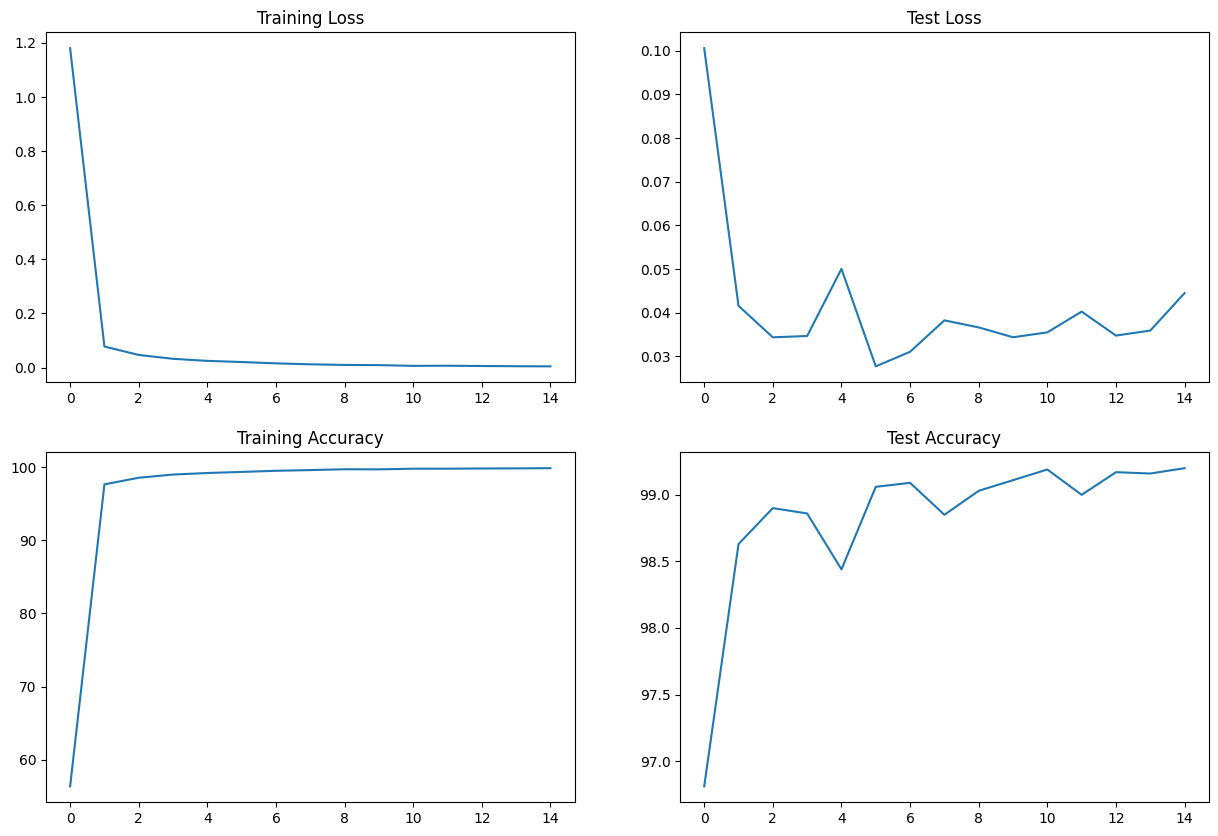

In [10]:
from utils import plot_stats
plot_stats()

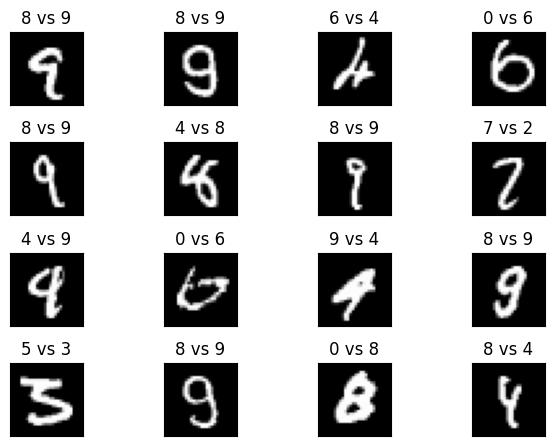

In [11]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual